In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# With this piece of code we make sure, that the graph we generate, gets displayed underneath the active cell.
%matplotlib inline

# We use the same file as in last weeks lecture:
file = "hasnur_seam_dataset_latest.csv"
df = pd.read_csv(file,nrows=101,skiprows=1)
df

,Year,February Average Temperature (Northeast),February Average Temperature (Midwest),February Average Temperature (Pennsylvania),March Average Temperature (Northeast),March Average Temperature (Midwest),March Average Temperature (Pennsylvania),Country,Population,Area (sq. mi.),Coastline (coast/area ratio),Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%)
0,1895,15.6,21.9,17.0,27.6,40.2,31.3,Afghanistan,31056997,647500,"0,00","163,07",700,"36,0"
1,1896,22.2,33.5,26.6,25.3,36.9,27.8,Angola,12127071,1246700,"0,13","191,19",1900,"42,0"
2,1897,23.6,34.7,27.9,32.0,44.0,36.9,Anguilla,13477,102,"59,80","21,03",8600,"42,1"
3,1898,24.8,33.3,26.7,38.0,46.0,42.0,Antigua & Barbuda,69108,443,"34,54","19,46",11000,"42,2"
4,1899,18.1,22.2,20.0,29.3,38.4,34.0,Argentina,39921833,2766890,"0,18","15,18",11200,"42,3"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1991,28.7,37.4,32.4,36.1,46.1,39.5,Kuwait,2418393,17820,"2,80","9,95",19000,"83,5"
97,1992,25.7,39.5,30.9,30.0,44.0,34.5,Kyrgyzstan,5213898,198500,"0,00","35,64",1600,"97,0"
98,1993,17.5,30.5,23.5,29.8,39.5,32.8,Laos,6368481,236800,"0,00","85,22",1700,"66,4"
99,1994,19.4,32.4,24.1,31.6,42.9,33.8,Latvia,2274735,64589,"0,82","9,55",10200,"99,8"


In [2]:
df["Year"]

0      1895
1      1896
2      1897
3      1898
4      1899
       ... 
96     1991
97     1992
98     1993
99     1994
100    1995
Name: Year, Length: 101, dtype: int64

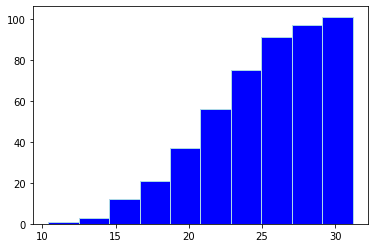

In [3]:
y=plt.hist(df["February Average Temperature (Northeast)"],
              facecolor = "blue",
              edgecolor = "lightblue",
              bins = 10,cumulative = True)

plt.show()

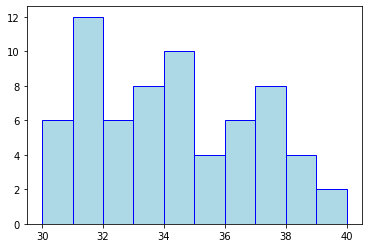

In [4]:
y=plt.hist(df["February Average Temperature (Midwest)"],
              facecolor = "lightblue",
              edgecolor = "blue",
              bins = 10, range=(30,40) )

plt.show()

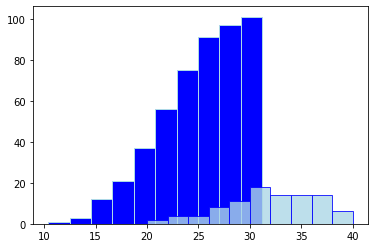

In [5]:
y=plt.hist(df["February Average Temperature (Northeast)"],
              facecolor = "blue",
              edgecolor = "lightblue",
              bins = 10,cumulative = True)
y=plt.hist(df["February Average Temperature (Midwest)"],
              facecolor = "lightblue",
              edgecolor = "blue",
              bins = 10,alpha = 0.8 ,range=(20,40))
plt.show()

In [6]:
from collections import defaultdict
from bisect import bisect_left

def count_intervals(sequence, intervals):
    count = defaultdict(int)
    intervals.sort()
    for item in sequence:
        pos = bisect_left(intervals, item)
        if pos == len(intervals):
            count[None] += 1
        else:
            count[intervals[pos]] += 1
    return count

data = df["February Average Temperature (Midwest)"].values
l = count_intervals(data, [20,25,30,35,40,45])

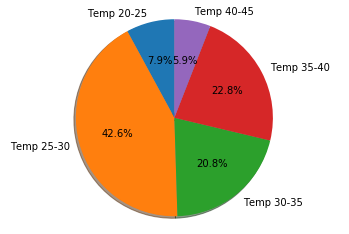

<Figure size 1440x1440 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Temp 20-25', 'Temp 25-30', 'Temp 30-35', 'Temp 35-40', 'Temp 40-45']
sizes = list(l.values())


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.figure(figsize=(20,20))
plt.show()

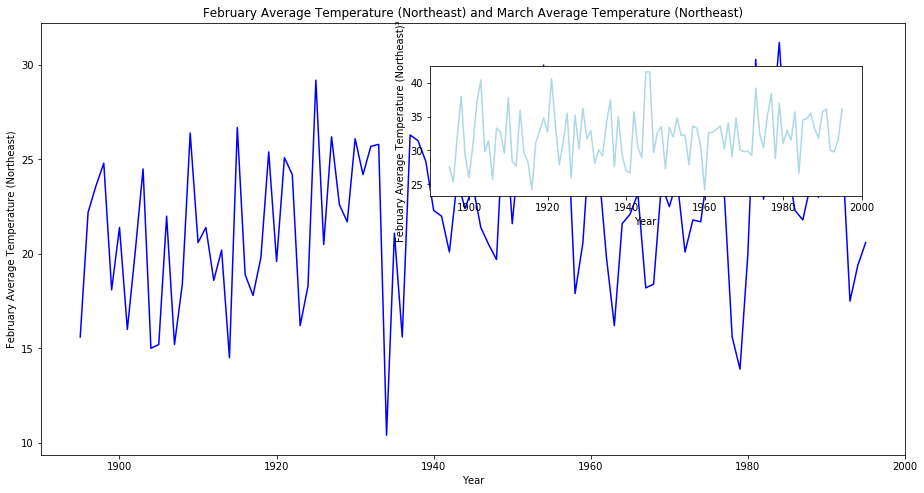

In [8]:
'''In the following example, the distribution of snow density and accumulation gets displayed'''

# Define the size of the whole figure (width/height)
fig = plt.figure(figsize = (12,6))

# Define size and position of the large graph(ax1) and insert graph(ax2): [x-position,y-position,width]
'''Try some different numbers and see what happens. Negative values are also possible, but stay in a small range,
otherwise your plot gets too small!'''
ax1 = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes([0.45, 0.6, 0.5, 0.3])

# Set a title
ax1.set_title("February Average Temperature (Northeast) and March Average Temperature (Northeast)")

'''In my example, only the first 200 km (first 400 data points) shall be displayed in this graph.
Therefore, the data is subsetted with iloc -> iloc[0:401]'''

# Set attributes for large graph
ax1.plot(df['Year'].iloc[0:101],
        df['February Average Temperature (Northeast)'].iloc[0:101],
        color = "blue") # set color
ax1.set_xlabel("Year") # set x-label
ax1.set_ylabel("February Average Temperature (Northeast)") # set y-label

# Set attributes for insert graph
ax2.plot(df['Year'].iloc[0:101],
        df['March Average Temperature (Northeast)'].iloc[0:101],
        color = "lightblue") # set color
ax2.set_xlabel("Year") # set x-label
ax2.set_ylabel("February Average Temperature (Northeast)³") # set y-label

plt.show()

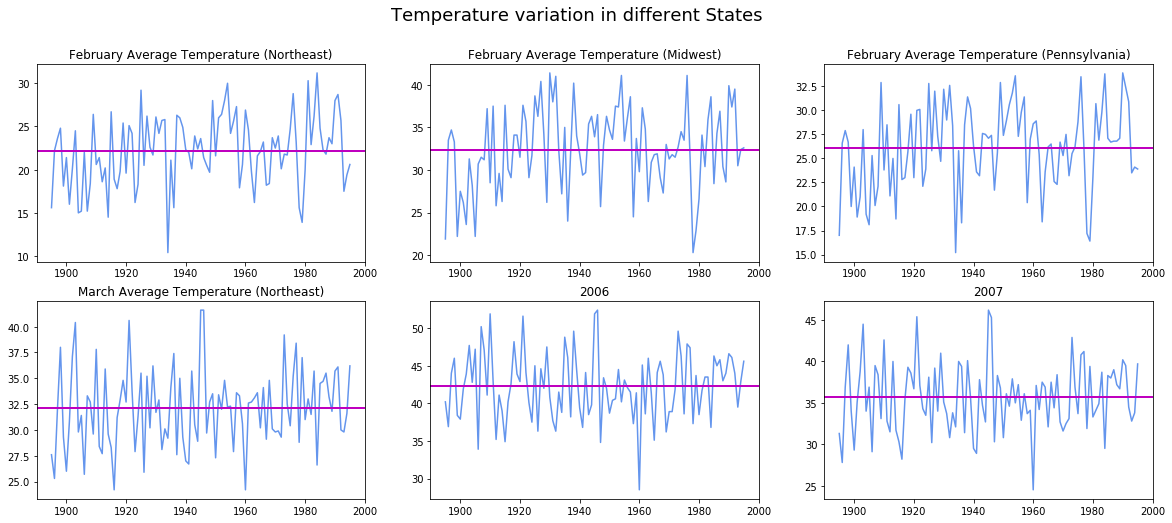

In [9]:
# Define the size of the whole figure (width/height)
fig = plt.figure(figsize =(20,8))

# Add a title
plt.suptitle("Temperature variation in different States",
            fontsize = 18)

#Create plot ax1 = "2004"
ax1 = fig.add_subplot(231) # position of individual subplot (Matrix = 111)
ax1.set_title("February Average Temperature (Northeast)") # Title of subplot
ax1.plot(df['Year'],
         df['February Average Temperature (Northeast)'],
        color = "cornflowerblue") # choose individual colors
plt.axhline(y = df['February Average Temperature (Northeast)'].mean(), linewidth=2, color='m') # Insert horizontal line 

#Create plot ax2 = "2005"
ax2 = fig.add_subplot(232)
ax2.set_title("February Average Temperature (Midwest)")
ax2.plot(df['Year'],
         df['February Average Temperature (Midwest)'],
        color = "cornflowerblue")
plt.axhline(y = df['February Average Temperature (Midwest)'].mean(), linewidth=2, color='m')

#Create plot ax3 = "2006"
ax3 = fig.add_subplot(233)
ax3.set_title("February Average Temperature (Pennsylvania)")
ax3.plot(df['Year'],
         df['February Average Temperature (Pennsylvania)'],
        color = "cornflowerblue")
plt.axhline(y = df['February Average Temperature (Pennsylvania)'].mean(), linewidth=2, color='m')

#Create plot ax4 = "2007"
ax4 = fig.add_subplot(234)
ax4.set_title("March Average Temperature (Northeast)")
ax4.plot(df['Year'],
         df['March Average Temperature (Northeast)'],
        color = "cornflowerblue")
plt.axhline(y = df['March Average Temperature (Northeast)'].mean(), linewidth=2, color='m')

#Create plot ax3 = "2006"
ax3 = fig.add_subplot(235)
ax3.set_title("2006")
ax3.plot(df['Year'],
         df['March Average Temperature (Midwest)'],
        color = "cornflowerblue")
plt.axhline(y = df['March Average Temperature (Midwest)'].mean(), linewidth=2, color='m')

#Create plot ax4 = "2007"
ax4 = fig.add_subplot(236)
ax4.set_title("2007")
ax4.plot(df['Year'],
        df['March Average Temperature (Pennsylvania)'],
       color = "cornflowerblue")
plt.axhline(y = df['March Average Temperature (Pennsylvania)'].mean(), linewidth=2, color='m')



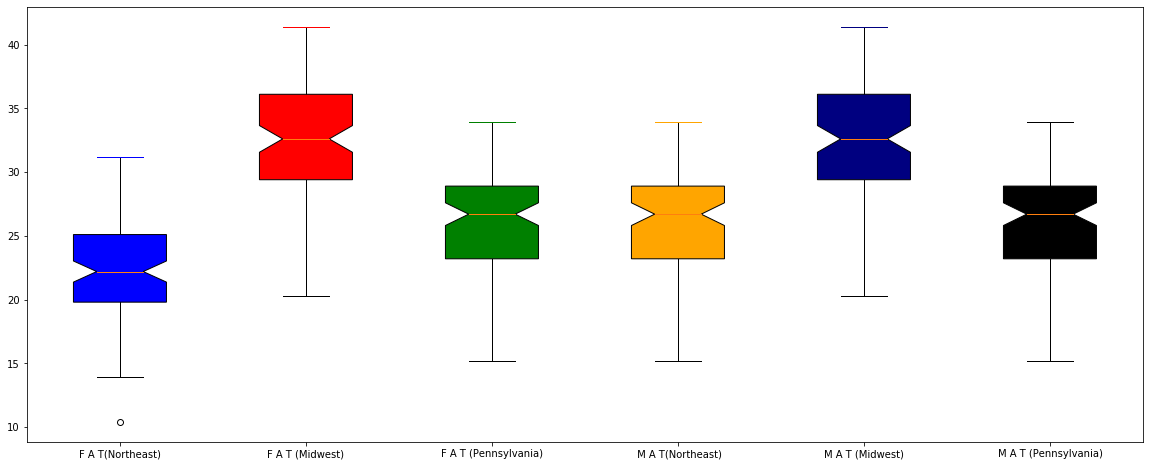

In [10]:
# To avoid problems with 'NaN's you can filter your data for missing values, while assigning the objects
plt.figure(figsize =(20,8))
value1=df["February Average Temperature (Northeast)"]  
FATN = value1[~np.isnan(value1)]

value2 = df["February Average Temperature (Midwest)"]
FATM = value2[~np.isnan(value2)]

value3=df["February Average Temperature (Pennsylvania)"]  
FATP = value3[~np.isnan(value3)]

value4=df["March Average Temperature (Northeast)"]  
MATN = value3[~np.isnan(value3)]

value5 = df["March Average Temperature (Midwest)"]
MATM = value2[~np.isnan(value2)]

value6=df["March Average Temperature (Pennsylvania)"]  
MATP = value3[~np.isnan(value3)]



# Assigning the boxplot data
plot_data=[FATN,FATM,FATP,MATN,MATM,MATP]

# Defining the colors
colors = ['blue', 'red', 'green','orange','navy','black']

bp = plt.boxplot(plot_data,
                patch_artist = True,
                notch = True)
for i in range(len(bp['boxes'])):
    bp['boxes'][i].set(facecolor = colors[i])
    bp['caps'][2*i + 1].set(color = colors[i])
    
plt.xticks([1,2,3,4,5,6],['F A T(Northeast)', 'F A T (Midwest)', 'F A T (Pennsylvania)',
                   ' M A T(Northeast)', 'M A T (Midwest)', 'M A T (Pennsylvania)'])
plt.show()

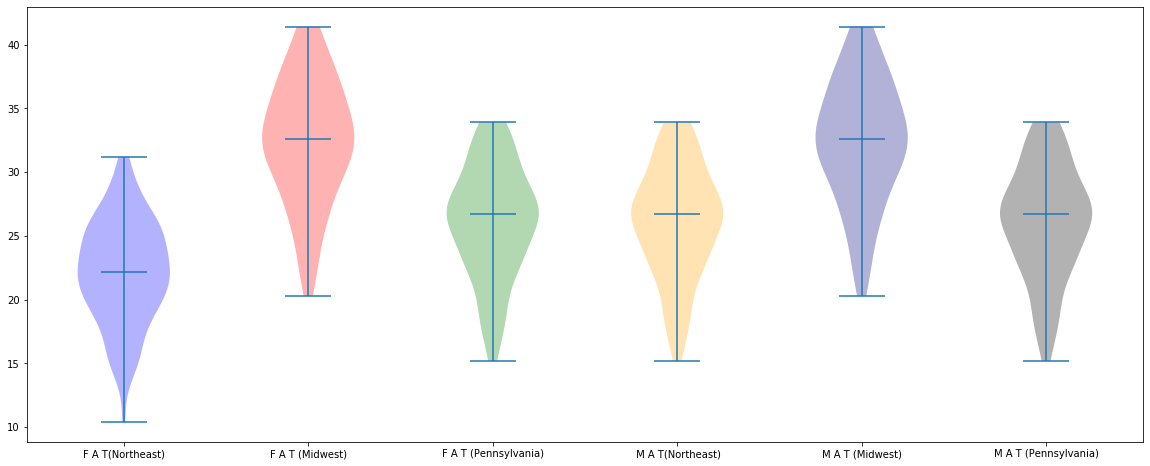

In [11]:
plt.figure(figsize =(20,8))
vp = plt.violinplot(plot_data,
                   showmedians = True)
plt.xticks([1,2,3,4,5,6],['F A T(Northeast)', 'F A T (Midwest)', 'F A T (Pennsylvania)',
                   ' M A T(Northeast)', 'M A T (Midwest)', 'M A T (Pennsylvania)'])

for i in range(len(vp['bodies'])):
    vp['bodies'][i].set(facecolor=colors[i])
    
plt.show()

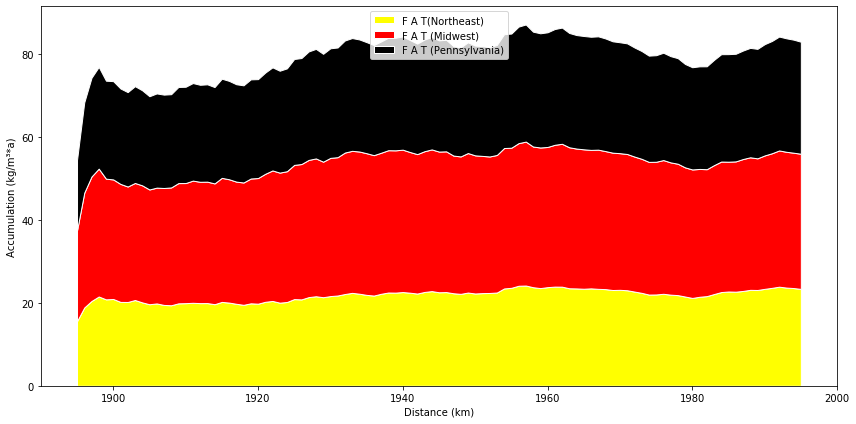

In [12]:
'''In the following example, the accumulation over time shall be displayed as a stack plot. Visualizing the data this
way, makes it easier to get information on the amount of snow that was accumulated over time. To make the information 
easier to read, the accumulation curve get flattened by using the rolling mean over 10 kilometres (20 steps/windows).
Test different window sizes to see how the outcome changes, but keep in mind what "applying the rolling mean",
means to your data!'''

# Applying the rolling mean in 10 km steps (= 20 windows) on the accumulation data
rmean1=df['February Average Temperature (Northeast)'].rolling(window=20, min_periods=1).mean()
rmean2=df['February Average Temperature (Midwest)'].rolling(window=20, min_periods=1).mean()
rmean3=df['February Average Temperature (Pennsylvania)'].rolling(window=20, min_periods=1).mean()

# Defining the size of the figure [link](https://kite.com/python/examples/1875/matplotlib-change-the-figure-size)
plt.figure(figsize=(12, 6))

# Assign x-axis variable
x = df['Year']

# Assign y-axis variables
y = np.vstack([rmean1,rmean2,rmean3])

# Defining the labels
labels = ['F A T(Northeast)',
         'F A T (Midwest)',
         'F A T (Pennsylvania)']

# Defining the color
colors = ['yellow', 'red', 'black']

# Plot data as stackplot, with afore defined labels and color. 
# The color that seperates the different stacks is chosen to be 'white'
plt.stackplot(x,y,
             labels = labels,
             colors = colors,
             edgecolor = 'white')

# Define x- and y-label
plt.xlabel('Distance (km)')
plt.ylabel('Accumulation (kg/m³*a)')

# Add a legend and define its position using loc= 'a number between 0 and 11'
plt.legend(loc=9)

# Automatically arranges a tight layout of your graph
plt.tight_layout()

plt.show()

In [13]:
# Create a copy of your data set
stem_data = df.copy()

# Compare two data sets or variables using `diff()`
stem_data[['FATNChange', 'MATNChange']] = df[['February Average Temperature (Northeast)',
                                                            'March Average Temperature (Northeast)']].diff()

/home/seam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/home/seam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/home/seam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


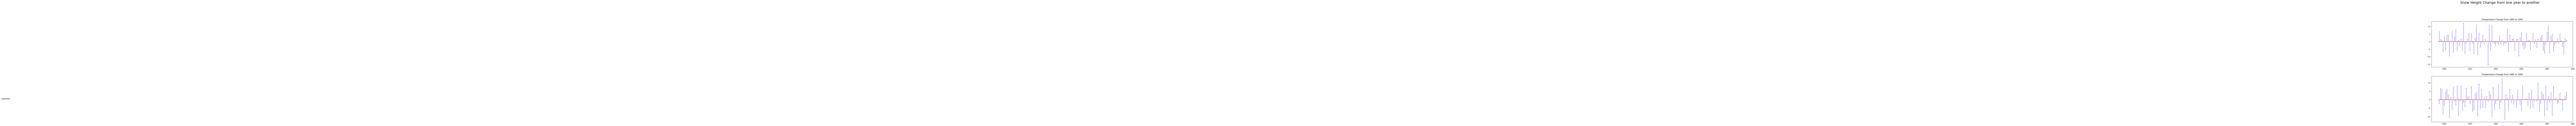

In [21]:
'''The errors occuring by running these functions can be ignored, it gives a hint on another function that 
    can be used when making more complex plots'''

# Define the size of your figure
plt.figure(figsize=(15,11))

# Add a main title and define position(y=) and letter size(fontsize=)
plt.suptitle('Snow Height Change from one year to another', y=1.03 , fontsize=20)

# Define the x-axis for both plots
dist = df['Year']

# Create first subplot(position matrix)
plt.subplot(211)
plt.stem(dist, # x-axis
         stem_data['FATNChange'], # y-axis first plot
         markerfmt = 'g_', # Defining the format of the markers at x/y-position -> 'g_' = "green, flat line"
         linefmt = 'b--', # Defining the format of the lines towards x/y-position -> 'b--' = "blue, dashed line"
         basefmt='r-') # Defining the format of the bottom line (by default at position 0) -> 'r-' = "red, solid line"
plt.title('Temperature Change from 1895 to 1995')


plt.subplot(212)
plt.stem(dist, # x-axis
         stem_data['MATNChange'], # y-axis second plot
         markerfmt = 'g_',
         linefmt = 'b--',
         basefmt='r-')
plt.title('Temperature Change from 1895 to 1995')

# Add a little text box inside the plot, by adding this function to the addressed plot
plt.text(65, -110, 'Differences in data size between the years, due to the loss of measuring stakes', style='italic',
        bbox={'facecolor': 'azure', 'alpha': 0.5, 'pad': 10}) # Define th style of the box

# Improves the layout to a tight version
plt.savefig('test.png')
plt.tight_layout()

plt.show()

In [24]:
# Create a copy of your data set
stem_data = df.copy()

# Compare two data sets or variables using `diff()`
stem_data[['HeightChange_0405', 'HeightChange_0506']]=df[['February Average Temperature (Northeast)','March Average Temperature (Northeast)']].diff()

/home/seam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  app.launch_new_instance()
/home/seam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/home/seam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


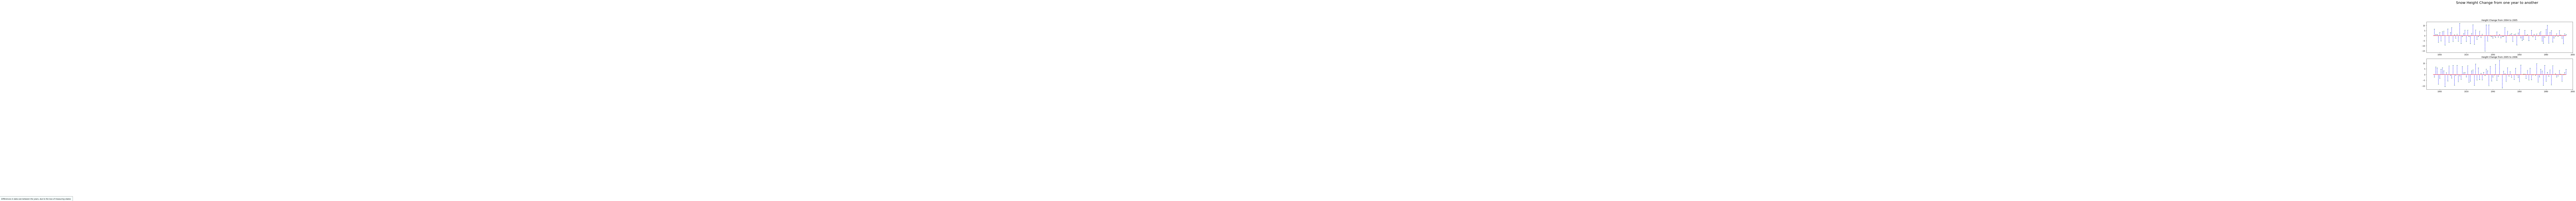

In [25]:
# Define the size of your figure
plt.figure(figsize=(15,11))

# Add a main title and define position(y=) and letter size(fontsize=)
plt.suptitle('Snow Height Change from one year to another', y=1.03 , fontsize=20)

# Define the x-axis for both plots
dist = df['Year']

# Create first subplot(position matrix)
plt.subplot(311)
plt.stem(dist, # x-axis
         stem_data['HeightChange_0405'], # y-axis first plot
         markerfmt = 'g_', # Defining the format of the markers at x/y-position -> 'g_' = "green, flat line"
         linefmt = 'b--', # Defining the format of the lines towards x/y-position -> 'b--' = "blue, dashed line"
         basefmt='r-') # Defining the format of the bottom line (by default at position 0) -> 'r-' = "red, solid line"
plt.title('Height Change from 2004 to 2005')


plt.subplot(312)
plt.stem(dist, # x-axis
         stem_data['HeightChange_0506'], # y-axis second plot
         markerfmt = 'g_',
         linefmt = 'b--',
         basefmt='r-')
plt.title('Height Change from 2005 to 2006')

# Add a little text box inside the plot, by adding this function to the addressed plot
plt.text(65, -110, 'Differences in data size between the years, due to the loss of measuring stakes', style='italic',
        bbox={'facecolor': 'azure', 'alpha': 0.5, 'pad': 10}) # Define th style of the box

# Improves the layout to a tight version
plt.tight_layout()

plt.show()